## Objectif
L'objectif de ce sujet d'étude est de comprendre et implémenter le modèle épidémiologique SIRD (Susceptibles, Infectés, Rétabli) avec une composante supplémentaire pour les décès. Vous utiliserez la méthode d'Euler pour résoudre numériquement le système d'équations différentielles qui décrit l'évolution de la maladie dans une population.
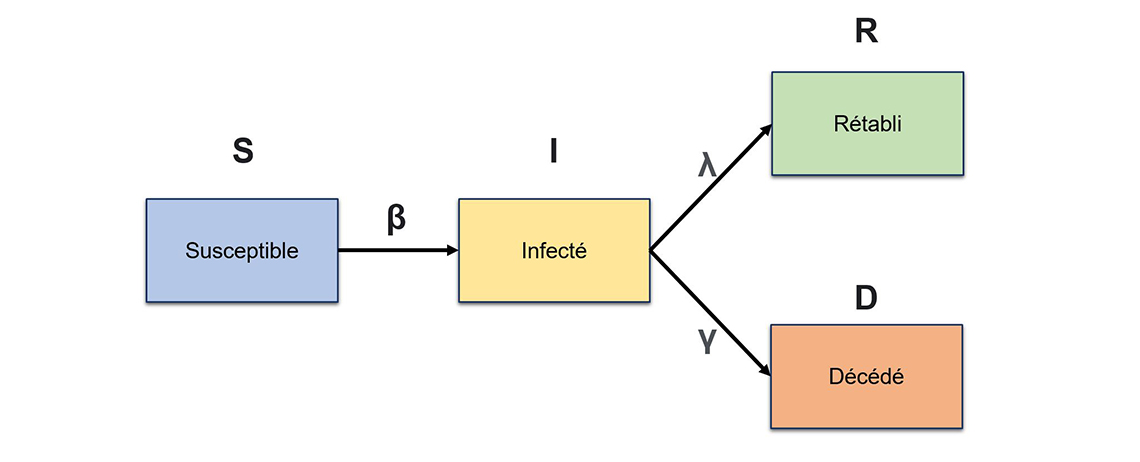


## Contexte
Le modèle SIR est un modèle mathématique utilisé en épidémiologie pour décrire la propagation d'une maladie infectieuse dans une population. Pour ce sujet, nous ajoutons une composante pour les décès (D), ce qui donne le modèle SIRD.

Les variables du modèle sont les suivantes :
- $S(t)$ : % de la population susceptibles d'être infectées à l'instant $t$
- $I(t)$ : % de la population infectées à l'instant $t$
- $R(t)$ : % de la population rétablies (et immunisées) à l'instant $t$
- $D(t)$ : % de la population décédées à l'instant $t$

Les paramètres du modèle sont :
- $\beta$ : Taux de transmission de la maladie (probabilité de transmission par contact)
- $\gamma$ : Taux de guérison (et d'immunisation)
- $\mu$ : Taux de mortalité dû à la maladie

Les équations différentielles qui décrivent le modèle SIRD sont :
- $\frac{dS}{dt} = -\beta \cdot S \cdot I$
- $\frac{dI}{dt} = \beta \cdot S \cdot I - \gamma \cdot I - \mu \cdot I$
- $\frac{dR}{dt} = \gamma \cdot I$
- $\frac{dD}{dt} = \mu \cdot I$

### Étape 1 : Implémentation de la méthode d'Euler
0. Discretiser le système d'équations différentielles
1. Écrire une fonction Python qui implémente la méthode d'Euler pour ce système d'équations différentielles. Cette fonction doit prendre en entrée :
    - Le paramétrage des équations différentielles
    - Les conditions initiales
    - Le pas de temps
    - La durée de la simulation

**Ici $t$ est en jour, donc si votre pas est égale à 0.01, il vous faut effectuer 100 pas pour simuler toute une journée**

- $S[t+1] = step * (-\beta \cdot S[t] \cdot I[t]) + S[t]$
- $I[t+1] = step * (\beta \cdot S[t] \cdot I[t] - \gamma \cdot I[t] - \mu \cdot I[t]) + I[t]$
- $R[t+1] = step * (\gamma \cdot I[t]) + R[t]$
- $D[t+1] = step * (\mu \cdot I[t]) + D[t]$

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [106]:
def euler_function(S, I, R, D, beta, gamma, mu, step, nb_days, predicted):
    
    nb_iteration = int(1 * nb_days / step)
    
    for t in range(0, nb_iteration):
        S.append(step * (-beta * S[t] * I[t]) + S[t])
        I.append(step * (beta * S[t] * I[t] - gamma * I[t] - mu * I[t]) + I[t])
        R.append(step * (gamma * I[t]) + R[t])
        D.append(step * (mu * I[t]) + D[t])

    if predicted:
        return S[::1001], I[::1001], R[::1001], D[::1001], nb_iteration
    
    return S, I, R, D, nb_iteration
    

### Étape 2 : Simulation et analyse
1. Effectuer une simulation pour un jeu de paramètres donné:
- $\beta$ = 0.5
- $\gamma$ = 0.15
- $\mu$ = 0.015
- $S(0)$ = 99 %
- $I(0)$ = 1 %
- $R(0)$ = 0 %
- $D(0)$ = 0 %
- un pas de temps choisi (par exemple 0.01).
- **Rappel : Ici  t  est en jour, donc si votre pas est égale à 0.01, il vous faut effectuer 100 pas pour simuler toute une journée**
2. Tracer les courbes de $S(t)$, $I(t)$, $R(t)$ et $D(t)$ en fonction du temps.

In [107]:
beta = 0.5
gamma = 0.15
mu = 0.015

step = 0.001
nb_days = 90

S = [0.99]
I = [0.01]
R = [0]
D = [0]

S, I, R, D, nb_iteration = euler_function(S, I, R, D, beta, gamma, mu, step, nb_days, False)


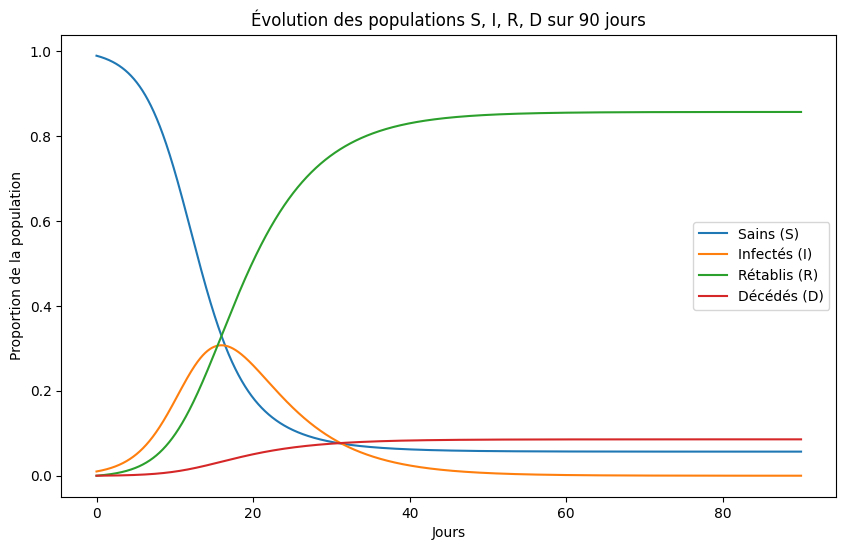

In [108]:
jours = np.linspace(0, nb_days, nb_iteration + 1)

# Création du graphique
plt.figure(figsize=(10, 6))

plt.plot(jours, S, label='Sains (S)')
plt.plot(jours, I, label='Infectés (I)')
plt.plot(jours, R, label='Rétablis (R)')
plt.plot(jours, D, label='Décédés (D)')

plt.xlabel('Jours')
plt.ylabel('Proportion de la population')
plt.title('Évolution des populations S, I, R, D sur 90 jours')
plt.legend()
# plt.grid(True)
plt.show()

## Etape 3: Ajustement des paramètres du modèle SIRD avec des données empiriques

### Objectif
L'objectif de cet exercice est de trouver les valeurs des paramètres $\beta\), \(\gamma\) et \(\mu\) qui permettent de reproduire au mieux les données générées de l'évolution de l'épidémie, en utilisant un dataset bruité.

### Instructions

1. **Lire les données du fichier `sird_dataset.csv`.**
2. **Implémenter une fonction de coût** qui mesure l'écart entre les données observées et les résultats du modèle SIRD pour un jeu de paramètres donné.(Justifiez votre choix, pourquoi un MSE au lieu d'une CCE ou inversement)
3. **Utiliser une méthode d'optimisation (Grid Search)** pour minimiser cette fonction de coût et trouver les valeurs optimales de $\beta$, $\gamma$ et $\mu$.

Voici les valeurs possible pour le triplet $\beta$, $\gamma$ et $\mu$ :
- $\beta$ varie de 0.25 à 0.5
- $\gamma$ varie de 0.08 à 0.15
- $\mu$ varie de 0.005 à 0.015

4. Visualisez sur un même graphique les résultats de votre modèle théorique optimal et les données empiriques.
**Rappel** : Ici $t$ est en jour, donc si votre pas est égale à 0.01, il vous faut effectuer 100 pas pour simuler toute une journée


In [109]:
#1

# Import du dataset

df = pd.read_csv('sird_dataset.csv')

print(df.head())

   Jour  Susceptibles  Infectés  Rétablis     Décès
0     0      0.998894  0.003197 -0.002455 -0.004622
1     1      0.991526  0.000409  0.010702  0.008857
2     2      0.982164  0.011018  0.004865 -0.001515
3     3      0.988132  0.008969 -0.006308  0.003571
4     4      0.971090  0.007307  0.005403  0.004894


Pour mesurer l'écart entre les données observées et les résultats du modèle SIRD, nous utiliserons la MSE. L'utilisation de la MSE est justifiée car nous voulons minimiser les écarts entre les valeurs observées et prédites par le modèle. La MSE est plus sensible aux grandes erreurs par rapport à l'erreur absolue moyenne (MAE), ce qui est souvent souhaitable dans notre cas.

In [110]:
#2

# Initialisation des valeurs optimales et du coût minimal

optimal_params = None
min_cost = float('inf')

# Implémentation de la MSE 

def mse(observed, predicted):
    return np.mean((observed - predicted) ** 2)

In [111]:
#3

import itertools

# Plage de valeurs pour la recherche par grille
# Données observées
S_optimal = df['Susceptibles'].values
I_optimal = df['Infectés'].values
R_optimal = df['Rétablis'].values
D_optimal = df['Décès'].values

beta_grid_search = np.linspace(0.25, 0.5, 5)
gamma_grid_search = np.linspace(0.08, 0.15, 5)
mu_grid_search = np.linspace(0.005, 0.015, 5)

for beta, gamma, mu in itertools.product(beta_grid_search, gamma_grid_search, mu_grid_search):
    
    S = [S_optimal[0]]
    I = [I_optimal[0]]
    R = [R_optimal[0]]
    D = [D_optimal[0]]

    
    S_pred, I_pred, R_pred, D_pred, nb_iteration = euler_function(S, I, R, D, beta, gamma, mu, step, nb_days, True)

    # Calcul du coût (MSE)
    cost = (
        mse(S_optimal, S_pred) +
        mse(I_optimal, I_pred) +
        mse(R_optimal, R_pred) +
        mse(D_optimal, D_pred)
    )
    
    # Mise à jour des paramètres optimaux si le coût est plus faible
    if cost < min_cost:
        min_cost = cost
        optimal_params = (beta, gamma, mu)


Paramètres optimaux : beta=0.375, gamma=0.1325, mu=0.012499999999999999
Coût minimal : 0.002224363798842385


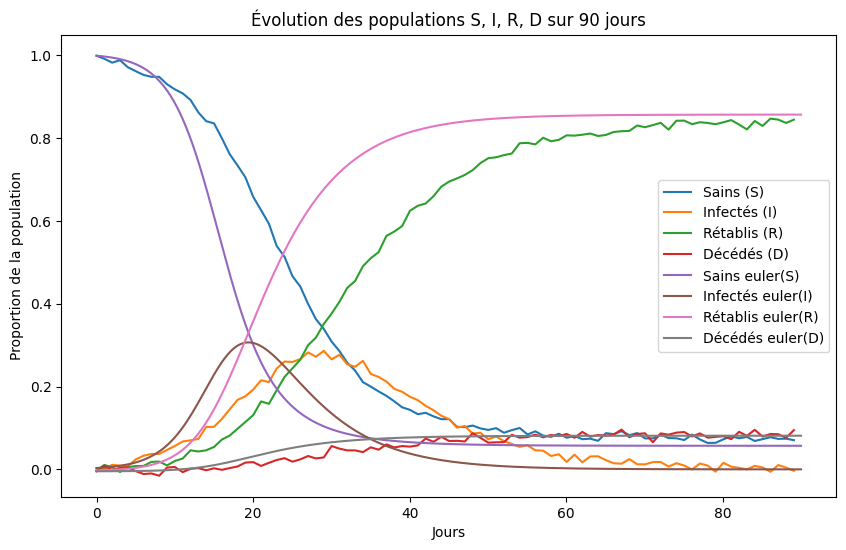

In [112]:
#4
print(f'Paramètres optimaux : beta={optimal_params[0]}, gamma={optimal_params[1]}, mu={optimal_params[2]}')
print(f'Coût minimal : {min_cost}')

jours = np.linspace(0, nb_days, nb_iteration + 1)

# Création du graphique
plt.figure(figsize=(10, 6))

plt.plot(jours[::1001], S_optimal, label='Sains (S)')
plt.plot(jours[::1001], I_optimal, label='Infectés (I)')
plt.plot(jours[::1001], R_optimal, label='Rétablis (R)')
plt.plot(jours[::1001], D_optimal, label='Décédés (D)')

plt.plot(jours, S, label='Sains euler(S)')
plt.plot(jours, I, label='Infectés euler(I)')
plt.plot(jours, R, label='Rétablis euler(R)')
plt.plot(jours, D, label='Décédés euler(D)')

plt.xlabel('Jours')
plt.ylabel('Proportion de la population')
plt.title('Évolution des populations S, I, R, D sur 90 jours')
plt.legend()
plt.show()

### Étape 4 : Scénarios de contrôle
On introduit un paramètre d'observation $R_0$ (le nombre de reproduction de base) dans le contexte du modèle SIRD est :

- $\ R_0 = \frac{\beta}{\gamma + \mu} \$

1. Expliquez intuitivement ce paramètre d'observation quand $R_0<1$ et quand $R_0>1$
2. Introduire une intervention (par exemple, la réduction de $\beta$ due à des mesures de distanciation sociale) et analyser son impact sur la dynamique de l'épidémie.
3. Comparer les scénarios avec et sans intervention.

1. Le nombre de reproduction de base, $R_0$ , est une mesure clé dans la modélisation des épidémies. Il représente le nombre moyen de nouveaux cas générés par un cas infectieux dans une population entièrement susceptible.

- Quand $R_0$ < 1 : Chaque personne infectée transmet la maladie à moins d'une personne en moyenne. Cela signifie que l'épidémie va diminuer et finir par disparaître. En termes pratiques, l'épidémie est sous contrôle et ne se propage pas largement.

- Quand $R_0$ > 1: Chaque personne infectée transmet la maladie à plus d'une personne en moyenne. Cela signifie que l'épidémie va croître de manière exponentielle jusqu'à ce qu'une proportion suffisante de la population soit infectée et devienne immunisée (par récupération ou décès), réduisant ainsi le nombre de susceptibles.

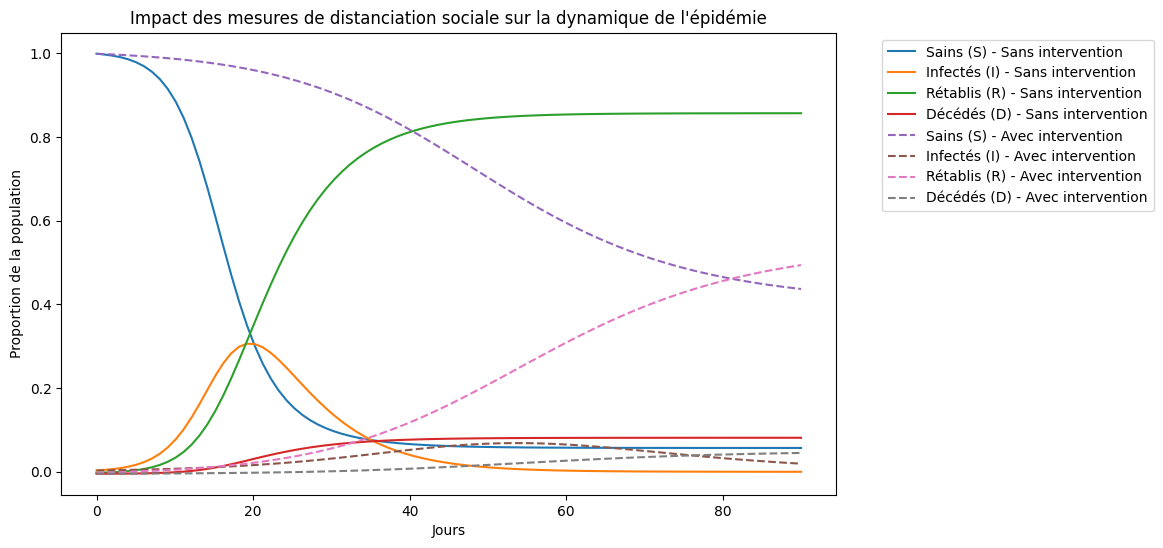

In [113]:
# Conditions initiales
S_init = [df['Susceptibles'].values[0]]
I_init = [df['Infectés'].values[0]]
R_init = [df['Rétablis'].values[0]]
D_init = [df['Décès'].values[0]]

# Simulation sans intervention
S_pred, I_pred, R_pred, D_pred, _ = euler_function(S_init[:], I_init[:], R_init[:], D_init[:], beta, gamma, mu, step, nb_days, predicted=True)
jours = np.linspace(0, nb_days, len(S_pred))

plt.figure(figsize=(10, 6))
plt.plot(jours, S_pred, label='Sains (S) - Sans intervention')
plt.plot(jours, I_pred, label='Infectés (I) - Sans intervention')
plt.plot(jours, R_pred, label='Rétablis (R) - Sans intervention')
plt.plot(jours, D_pred, label='Décédés (D) - Sans intervention')

# Intervention : réduction de beta
reduction_factor = 0.5
beta_reduced = beta * reduction_factor

S_pred_int, I_pred_int, R_pred_int, D_pred_int, _ = euler_function(S_init[:], I_init[:], R_init[:], D_init[:], beta_reduced, gamma, mu, step, nb_days, predicted=True)

plt.plot(jours, S_pred_int, label='Sains (S) - Avec intervention', linestyle='dashed')
plt.plot(jours, I_pred_int, label='Infectés (I) - Avec intervention', linestyle='dashed')
plt.plot(jours, R_pred_int, label='Rétablis (R) - Avec intervention', linestyle='dashed')
plt.plot(jours, D_pred_int, label='Décédés (D) - Avec intervention', linestyle='dashed')

plt.xlabel('Jours')
plt.ylabel('Proportion de la population')
plt.title('Impact des mesures de distanciation sociale sur la dynamique de l\'épidémie')
plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


3. On peut voir que avec une intervention le pourcentage de personnes infectées est similaire que sans intervention mais le pourcentage de personnes saines est beaucoup plus élevé au bout des 90 jours.
On remarque aussi que le pourcentage de décès est inférieur au bout de 90 jours. Et pour finir on peut expliquer la "baisse" de pourcentage de personnes rétablies car le pourcentage de personnes saines est beaucoup plus élevé, ce qui est logique.